# **Unveiling the Truth: Unraveling the Gender Pay Gap, Exposing the Factors, and Demystifying Occupational Segregation**

### About the Dataset:

**[The Employment and Earning by Occupation](https://www.dol.gov/agencies/wb/data/occupations)** dataset from the US Department of Labor in this project provides valuable insights into the context of occupational segregation and the gender pay gap. This dataset offers valuable insights for researchers and stakeholders, shedding light on the intricate workings of the gender pay gap and revealing the underlying factors that perpetuate these disparities. From scrutinizing wage discrepancies to unraveling the prevalence of occupational segregation, this data is a vital resource in the relentless pursuit of gender equality in the workforce.

In [ ]:
# import & alias modules
import math
import pandas as pd
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from google.colab import drive
drive.mount('/content/gdrive')
sns.set()
pd.set_option('display.max_colwidth', None)

Mounted at /content/gdrive


## Bringing in the Data

In [ ]:
#read in data
gender_pay_df = pd.read_csv("/content/gdrive/MyDrive/Thinkful /Capstone 3/Book3.csv")
gender_pay_df.info() # see the information for our dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336 entries, 0 to 335
Data columns (total 10 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   Occupation                                          336 non-null    object 
 1   Number of full-time workers                         336 non-null    int64  
 2   Number of men                                       336 non-null    int64  
 3   Number of women                                     336 non-null    int64  
 4   Percentage of women in occupational group           336 non-null    float64
 5   Median earnings                                     336 non-null    int64  
 6   Median earnings men                                 336 non-null    int64  
 7   Median earnings women                               336 non-null    int64  
 8   Women's earnings as a percentage of men's earnings  336 non-null    float64
 9  

In [ ]:
# finding any missing values
missing_values_per_column = gender_pay_df.isnull().sum()
print(missing_values_per_column)

Occupation                                            0
Number of full-time workers                           0
Number of men                                         0
Number of women                                       0
Percentage of women in occupational group             0
Median earnings                                       0
Median earnings men                                   0
Median earnings women                                 0
Women's earnings as a percentage of men's earnings    0
gender_pay_gap                                        0
dtype: int64


No missing values

In [ ]:
gender_pay_df.head() # see the first 5 rows

,Occupation,Number of full-time workers,Number of men,Number of women,Percentage of women in occupational group,Median earnings,Median earnings men,Median earnings women,Women's earnings as a percentage of men's earnings,gender_pay_gap
0,Accountants and auditors,1452102,614573,837529,57.7,75713,84537,69691,82.4,-14846
1,Actuaries,33962,25529,8433,24.8,129791,135774,124509,91.7,-11265
2,Administrative services managers,59654,14792,44862,75.2,70082,85238,65351,76.7,-19887
3,Advertising and promotions managers,57735,27035,30700,53.2,86690,97919,77910,79.6,-20009
4,Advertising sales agents,86861,45286,41575,47.9,67398,68208,66313,97.2,-1895


In [ ]:
gender_pay_df.describe().round() # see the descriptive statistics

,Number of full-time workers,Number of men,Number of women,Percentage of women in occupational group,Median earnings,Median earnings men,Median earnings women,Women's earnings as a percentage of men's earnings,gender_pay_gap
count,336.0,336.0,336.0,336.0,336.0,336.0,336.0,336.0,336.0
mean,301510.0,163993.0,137516.0,48.0,59922.0,65021.0,54731.0,85.0,-10290.0
std,442765.0,285085.0,243426.0,24.0,26110.0,28710.0,23693.0,10.0,9287.0
min,12709.0,7007.0,5333.0,2.0,23260.0,23007.0,21581.0,56.0,-62858.0
25%,59283.0,23276.0,22719.0,28.0,39810.0,42352.0,35586.0,79.0,-13802.0
50%,124723.0,53474.0,53587.0,50.0,54991.0,59526.0,50924.0,86.0,-8325.0
75%,335518.0,175718.0,145830.0,68.0,75513.0,81772.0,69193.0,93.0,-3942.0
max,3776173.0,2544011.0,2201328.0,98.0,185908.0,190138.0,181130.0,111.0,5256.0


What I see:
1. The percentage of women in a occupation is on average 48%
2. Men are earning about 10,289 more than women as well as men are making about 5,099 more than the overall median earnings

# Explore the Dataset


In [ ]:
# Top 10 Jobs where the gender pay gap is the largest
sorted_df = gender_pay_df.sort_values('gender_pay_gap')
selected_columns = sorted_df[['Occupation', 'Percentage of women in occupational group','gender_pay_gap']]
selected_columns.head(10)

,Occupation,Percentage of women in occupational group,gender_pay_gap
160,"Judges, magistrates, and other judicial workers",49.8,-62858
79,Dentists,30.2,-49974
244,Personal financial advisors,30.6,-47521
295,"Securities, commodities, and financial services sales agents",27.4,-40707
39,Chief executives,27.8,-40538
321,"Title examiners, abstractors, and searchers",71.8,-38528
289,Sales managers,31.5,-38300
110,"Financial clerks, all other",60.1,-38242
222,Other financial specialists,51.4,-37777
201,Nuclear medicine technologists and medical dosimetrists,46.6,-37524


I noticed that the jobs with the highest pay gap for women have below average percentage of women in occupational group.

In [ ]:
# Top 10 Jobs where the gender pay gap is the smallest
sorted_df = gender_pay_df.sort_values('gender_pay_gap')
selected_columns = sorted_df[['Occupation', 'Percentage of women in occupational group','gender_pay_gap']]
selected_columns.tail(10)

,Occupation,Percentage of women in occupational group,gender_pay_gap
107,Fast food and counter workers,62.6,391
308,Substance abuse and behavioral disorder counselors,74.7,652
304,Special education teachers,83.7,726
243,"Personal care and service workers, all other",58.8,753
20,Barbers,19.4,2398
25,Biological technicians,53.0,2730
241,Payroll and timekeeping clerks,85.6,3373
103,Executive secretaries and executive administrative assistants,94.4,4393
40,"Child, family, and school social workers",85.6,5041
138,Healthcare social workers,78.5,5256


I noticed that the jobs with the lowest pay gap for women have above average percentage of women in occupational group.

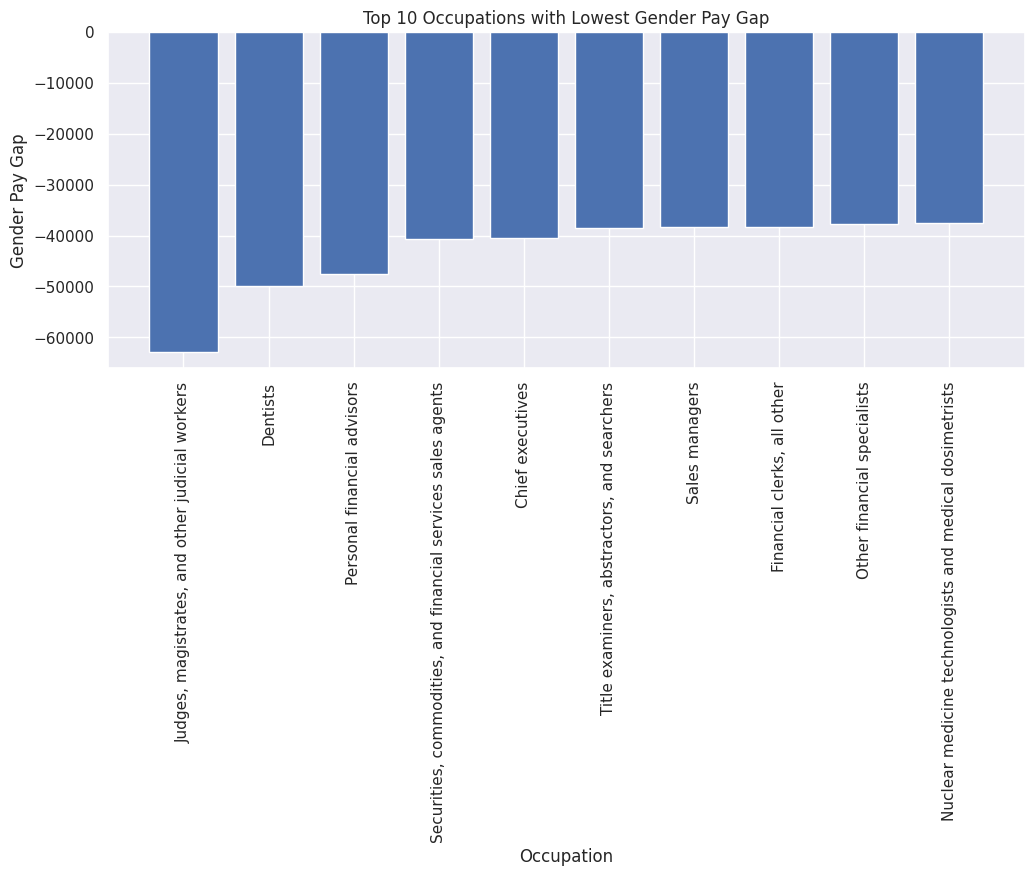

In [ ]:
# Sort the dataframe by gender pay gap in ascending order
sorted_df = gender_pay_df.sort_values('gender_pay_gap')

# Select the top 10 rows with the lowest gender pay gap
top_10_occupations = sorted_df.head(10)

# Create the bar graph
plt.figure(figsize=(12, 8))

# Plot the gender pay gap as a bar
plt.subplot(2, 1, 1)
plt.bar(top_10_occupations['Occupation'], top_10_occupations['gender_pay_gap'])
plt.xlabel('Occupation')
plt.ylabel('Gender Pay Gap')
plt.title('Top 10 Occupations with Lowest Gender Pay Gap')

# Adjust the layout to avoid overlapping labels
plt.tight_layout()

# Rotate the x-axis labels for better readability
plt.xticks(rotation=90)

plt.show()


In [ ]:
# descriptive stats on Percentage of Women in occupational group
gender_pay_df['Percentage of women in occupational group'].describe()

count    336.000000
mean      48.071131
std       24.082648
min        1.600000
25%       28.100000
50%       49.900000
75%       67.825000
max       97.600000
Name: Percentage of women in occupational group, dtype: float64

The average percentage of women in occupational group is 48%

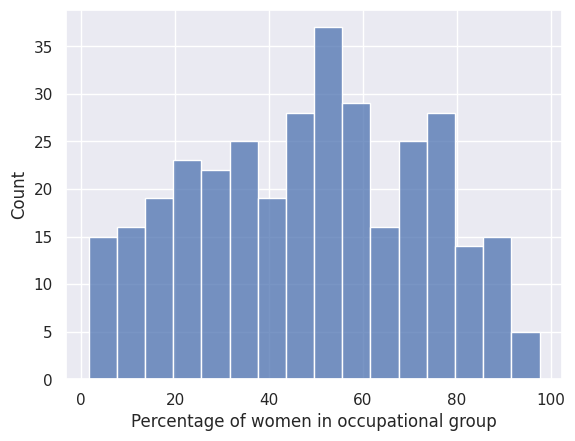

In [ ]:
ax = sns.histplot(gender_pay_df['Percentage of women in occupational group'], bins=16)

<Axes: xlabel="Women's earnings as a percentage of men's earnings", ylabel='Percentage of women in occupational group'>

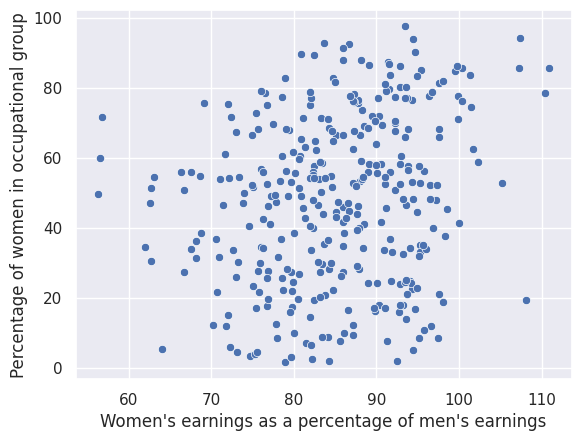

In [ ]:
# check to see the correlation between Women's earnings as a percentage of men's earnings
# is effected by the percentage of women in occupational group
sns.scatterplot(x="Women's earnings as a percentage of men's earnings", y="Percentage of women in occupational group", data=gender_pay_df)

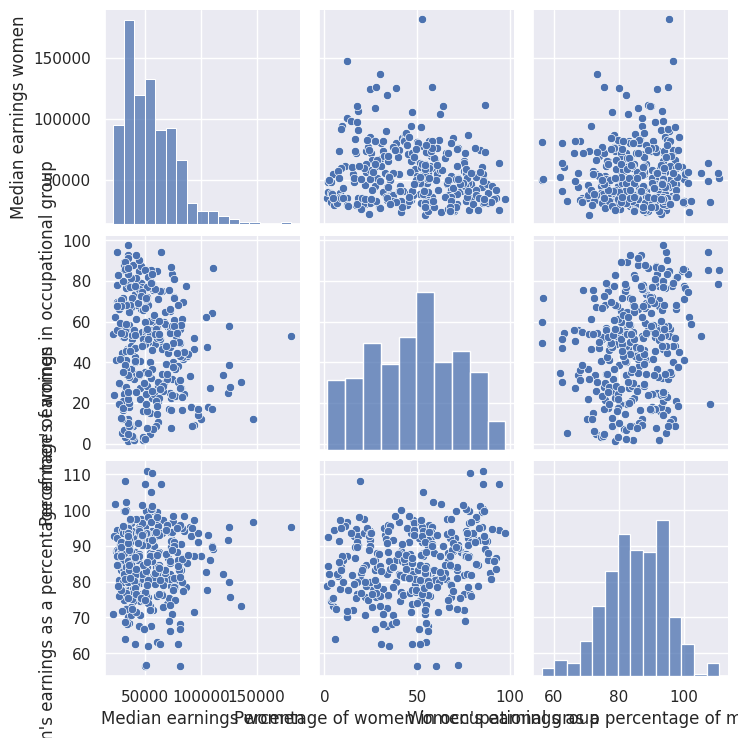

In [ ]:
sns.pairplot(gender_pay_df, vars = ["Median earnings women", "Percentage of women in occupational group", "Women's earnings as a percentage of men's earnings"])

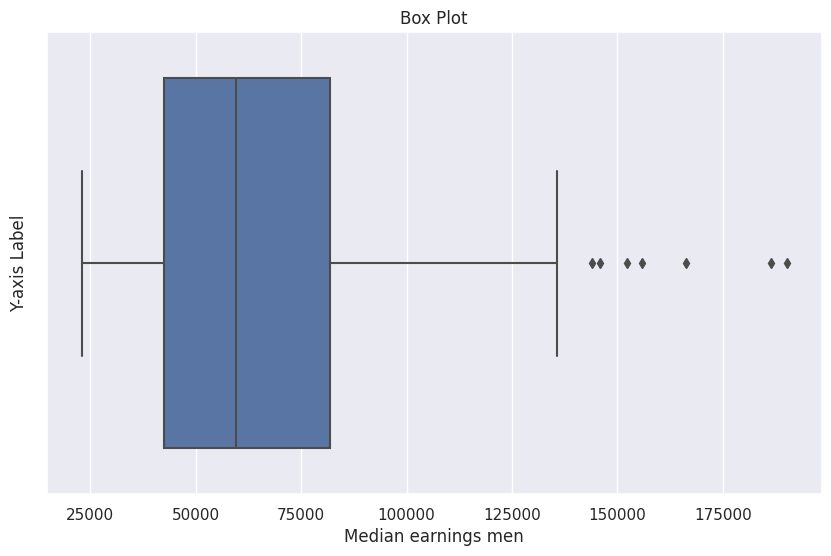

In [ ]:
# Create the box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Median earnings men', data=gender_pay_df)
plt.xlabel('Median earnings men')
plt.ylabel('Y-axis Label')
plt.title('Box Plot')
plt.show()

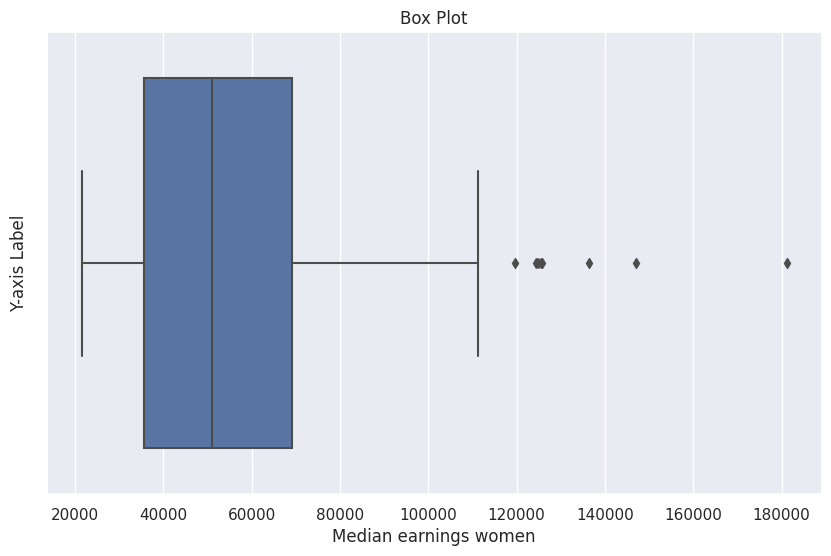

In [ ]:
# Create the box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Median earnings women', data=gender_pay_df)
plt.xlabel('Median earnings women')
plt.ylabel('Y-axis Label')
plt.title('Box Plot')
plt.show()

# Analysis

In [ ]:
# assess if there is a correlation between gender representation and earnings.
#stats.pearsonr(gender_pay_df[gender_pay_df["Median earnings"], "Percentage of women in occupational group"])
stats.pearsonr(gender_pay_df["Median earnings women"], gender_pay_df["Percentage of women in occupational group"])

PearsonRResult(statistic=-0.12294491277748029, pvalue=0.024210276513826)

Based on these results, I can conclude that there is a weak negative correlation between median earning of women and the percentage of women in occupational group. The negative correlation suggests that as one variable increases, the other tends to decrease, although the relationship is not very strong. Additionally, the statistical significance of the correlation indicates that this relationship is unlikely to have occurred by chance.

## Hypothesis 1: There is a positive correlation between the proportion of women in an occupational group and the ratio of women's earnings to men's earnings within that group.

In [ ]:
# Test for correlation
stats.pearsonr(gender_pay_df["Percentage of women in occupational group"], gender_pay_df["Women's earnings as a percentage of men's earnings"])

PearsonRResult(statistic=0.21558718826453735, pvalue=6.776518262793857e-05)

The correlation coefficient is positive (0.2156), suggesting a weak positive correlation between the variables: "Percentage of women in occupational group" and "Women's Earnings as a percentage of men's earnings"

However, it is important to note that the correlation is relatively weak, as the value is closer to zero than to 1. Therefore, while there is a positive relationship between the variables, it is not very strong.

## Hypothesis 2: There is no significant difference in the gender pay gap between occupations where the proportion of women in the occupational group is below average than the proportion of men, compared to occupations where the proportions are above average.

In [ ]:
# Spliting the data for a t-test
above_df = gender_pay_df.loc[gender_pay_df['Percentage of women in occupational group'] > 48]
below_df = gender_pay_df.loc[(gender_pay_df['Percentage of women in occupational group'] < 48)]

In [ ]:
# sanity check
above_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 176 entries, 0 to 335
Data columns (total 10 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   Occupation                                          176 non-null    object 
 1   Number of full-time workers                         176 non-null    int64  
 2   Number of men                                       176 non-null    int64  
 3   Number of women                                     176 non-null    int64  
 4   Percentage of women in occupational group           176 non-null    float64
 5   Median earnings                                     176 non-null    int64  
 6   Median earnings men                                 176 non-null    int64  
 7   Median earnings women                               176 non-null    int64  
 8   Women's earnings as a percentage of men's earnings  176 non-null    float64
 9  

In [ ]:
# sanity check
below_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 160 entries, 1 to 333
Data columns (total 10 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   Occupation                                          160 non-null    object 
 1   Number of full-time workers                         160 non-null    int64  
 2   Number of men                                       160 non-null    int64  
 3   Number of women                                     160 non-null    int64  
 4   Percentage of women in occupational group           160 non-null    float64
 5   Median earnings                                     160 non-null    int64  
 6   Median earnings men                                 160 non-null    int64  
 7   Median earnings women                               160 non-null    int64  
 8   Women's earnings as a percentage of men's earnings  160 non-null    float64
 9  

<Axes: xlabel='gender_pay_gap', ylabel='Count'>

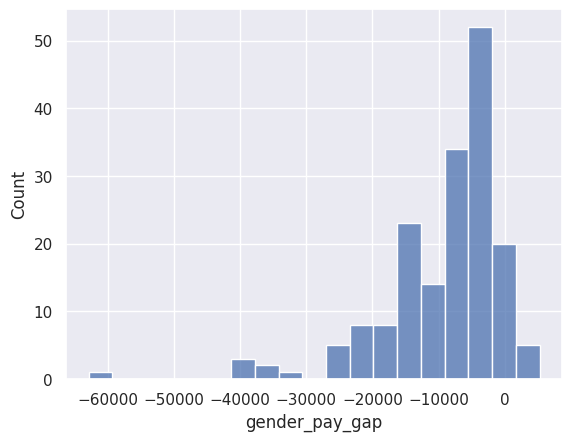

In [ ]:
# historgram to check for normal distribution
sns.histplot(above_df['gender_pay_gap'])

Normal distribution and negative skew

<Axes: xlabel='gender_pay_gap', ylabel='Count'>

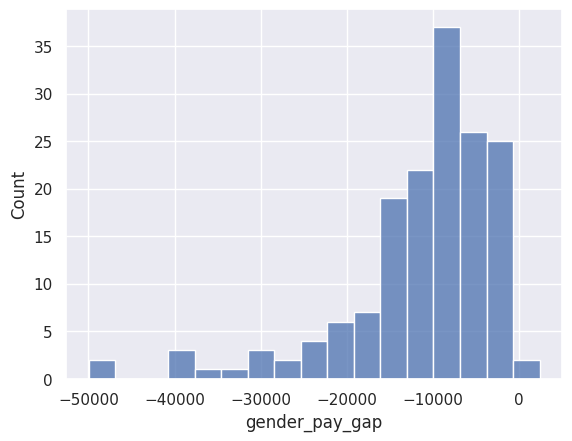

In [ ]:
sns.histplot(below_df['gender_pay_gap'])

Normal distribution and negative skew

In [ ]:
# run two sample t-test
t_test = stats.ttest_ind(above_df["gender_pay_gap"], below_df["gender_pay_gap"])
print(t_test)

TtestResult(statistic=2.021059283403412, pvalue=0.04407102820779627, df=334.0)


### Reject the null hypothesis.  There is a significant difference in the gender pay gap between occupations where the proportion of women in occupational group is below average, compared to the occupations where the proportion of women in occupational group are above average.

In [ ]:
sample_1_n = above_df.shape[0]
sample_2_n = below_df.shape[0]
sample_1_mean = above_df['gender_pay_gap'].mean()
sample_2_mean = below_df['gender_pay_gap'].mean()
sample_1_var = above_df['gender_pay_gap'].var()
sample_2_var = below_df['gender_pay_gap'].var()

In [ ]:
print(sample_1_mean)

-9317.875


In [ ]:
print(sample_2_mean)

-11358.775


In [ ]:
import math
std_err_difference = math.sqrt((sample_1_var/sample_1_n)+(sample_2_var/sample_2_n))

mean_difference = sample_2_mean - sample_1_mean

margin_of_error = 1.96 * std_err_difference
ci_lower = mean_difference - margin_of_error
ci_upper = mean_difference + margin_of_error

print("The difference in means at the 95% confidence interval is between "+str(ci_lower)+" and "+str(ci_upper)+".")

The difference in means at the 95% confidence interval is between 64.02207388192505 and 4017.777926118074.


### With 95% confidence, the CI is approx $64-$4,000 more gender pay gap

The results of the analysis strongly support my hypothesis that the gender pay gap is wider in occupations where the percentage of women in the occupational group is significantly lower than the percentage of men. The p-value, which is less than 0.005, indicates that the observed difference in the gender pay gap between these two types of occupations is highly unlikely to have occurred by chance.

This means that in occupations where there are fewer women compared to men, the gender pay gap is more pronounced. It suggests that factors such as occupational segregation and unequal representation of women in certain fields contribute to the wider pay gap. These findings highlight the importance of addressing gender disparities in occupational distribution and promoting equal opportunities for women in all professions.

By rejecting the null hypothesis, I can confidently conclude that there is a significant difference in the gender pay gap based on the proportion of women in occupational groups. This underscores the need for targeted efforts to address and reduce the gender pay gap, particularly in occupations where women are underrepresented.

## Null Hypothesis 2: There is no significant difference in median earnings between the below average percentage of women in the occupational group and above average percentage of women in the occupational group.

<Axes: xlabel='Median earnings', ylabel='Count'>

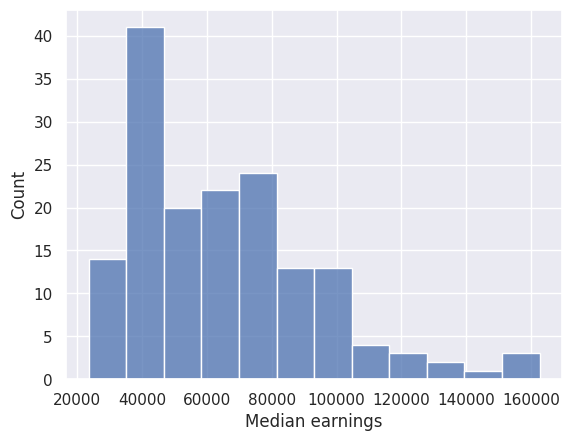

In [ ]:
# historgram to check for normal distribution
sns.histplot(above_df['Median earnings'], bins = 12)

<Axes: xlabel='Median earnings', ylabel='Count'>

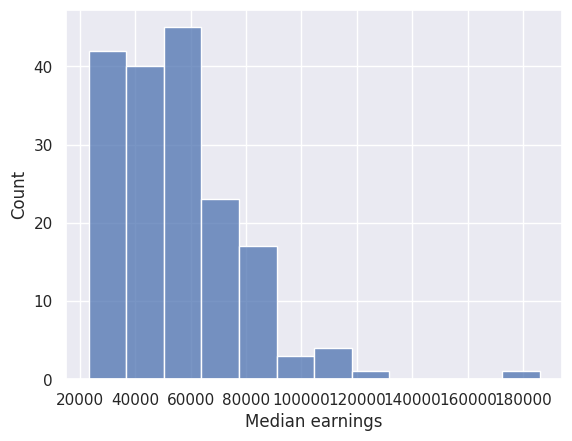

In [ ]:
# historgram to check for normal distribution
sns.histplot(below_df['Median earnings'], bins = 12)

In [ ]:
# run two sample t-test
t_test = stats.ttest_ind(above_df["Median earnings"], below_df["Median earnings"])
print(t_test)

TtestResult(statistic=3.5189986877452024, pvalue=0.0004932063963950872, df=334.0)


### Reject the null hypothesis and conclude that there is a significant difference in median earnings between the below average percentage of women in occupational group and above average percentage of women in occupational group.

In [ ]:
sample_3_n = below_df.shape[0]
sample_4_n = above_df.shape[0]
sample_3_mean = below_df['Median earnings'].mean()
sample_4_mean = above_df['Median earnings'].mean()
sample_3_var = below_df['Median earnings'].var()
sample_4_var = above_df['Median earnings'].var()

In [ ]:
print(sample_3_mean)

65092.075


In [ ]:
print(sample_4_mean)

55221.818181818184


In [ ]:
import math
std_err_difference = math.sqrt((sample_3_var/sample_3_n)+(sample_4_var/sample_4_n))

mean_difference = sample_4_mean - sample_3_mean

margin_of_error = 1.96 * std_err_difference
ci_lower = mean_difference - margin_of_error
ci_upper = mean_difference + margin_of_error

print("The difference in means at the 95% confidence interval is between "+str(ci_lower)+" and "+str(ci_upper)+".")

The difference in means at the 95% confidence interval is between -15425.57808545366 and -4314.935550909966.


### With 95% confidence, the CI is approx $4,300-$15,00 less in median earings



The difference in how much people earn in different jobs, depending on the percentage of men and women in those jobs, shows that society has certain expectations and biases about what jobs are suitable for each gender. These expectations can push people towards certain jobs and discourage them from others, based on their gender.

Because of these expectations, some jobs end up being mostly done by men, while others are mostly done by women. This separation of jobs is called occupational segregation. Unfortunately, this segregation can also affect how much people get paid. Jobs that are seen as more "for women" often get paid less than jobs seen as more "for men." This creates a gender pay gap, where women tend to earn less than men.

The fact that there is a significant difference in how much people earn in jobs with different percentages of men and women shows that these societal expectations and biases have a big impact on our work and pay. It's important to challenge and change these biases so that everyone has equal opportunities and fair treatment in their careers.

# Conclusion:

In conclusion, the analysis shows that how much people earn in different jobs is influenced by the percentage of men and women in those jobs, which is affected by societal expectations and biases. This creates occupational segregation, where certain jobs are seen as more suitable for men or women, leading to a gender pay gap. It's clear that we need to work harder to bridge this gap and achieve true gender equality in the workplace. The wider pay gap in occupations with fewer women emphasizes the importance of addressing unequal representation and providing equal opportunities for women in all professions.

## Recommendations:
1.  Promote Gender Equality- Let's spread awareness about the impact of society's expectations and biases on occupational segregation and the gender pay gap. We can start discussions and support initiatives that challenge traditional gender roles and promote equal opportunities for everyone in all professions.
2. Equal Pay Advocacy: We should advocate for policies and practices that ensure fair pay for the same work, no matter your gender or job. Let's support organizations and campaigns that are working hard to close the gender pay gap and tackle the root causes of occupational segregation.
3. Education and Training: Education is key! We can provide programs that teach about diversity and inclusion in the workplace. Workshops and seminars on unconscious bias, gender stereotypes, and the benefits of having diverse teams can make a big difference. We should also encourage employers to offer diversity training to create inclusive work environments.
4. Mentorship and Support: We should create mentorship programs that connect people from underrepresented genders with experienced professionals in the fields they're interested in. Having support networks and resources can help individuals overcome challenges and break down barriers related to occupational segregation.
5. Data Collection and Analysis: Let's collect and analyze data on gender representation and pay disparities in different jobs. By keeping track of progress and evaluating the impact of our initiatives, we can make informed decisions and bring about meaningful change. Data-driven insights are powerful!
6. Collaboration and Partnerships: We should team up with organizations, policymakers, and advocacy groups that are fighting for gender equality. Together, we can make a bigger impact and share the best practices for addressing occupational segregation and promoting equal opportunities for everyone.
7. Be an Ally: Stand up against gender discrimination and inequality. Use your voice and influence to support initiatives that aim to close the gender pay gap. Amplify the voices of women in meetings and discussions, and actively listen to their experiences and perspectives.